# Cross-Validation

## Remarks
- It is a statistical technique that evaluates the performance of a model.
- Splits the dataset into multiple sets (i.e training/test sets).
- Asses how well a model generalizes to unseen data.
- Reduces the risk of overfitting and underfitting.
- Compare and select models or hyperparameters more reliable.
- If the model is overfitting, the performance will vary significantly across folders (high variance).

## Variants of Cross-Validation

1. **Stratified k-Fold Cross-Validation**: This is useful for imbalanced data.
2. **Leave-One-Out Cross-Validation (LOOCV)**: Expensive, but useful for small datasets.
3. **Time-Series Cross-Validation**: Train on past data, and test on future data, preserving the time sequence.
4. **Group k-Fold Cross-Validation**: keep data points from the same group within the training or test sets (e.g. patient or machine).

## Implementation

### Basic k-Fold Cross-Validation

In [177]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score

#. Load Data
data = load_iris()
X, y = data.data, data.target

#. k-Fold CV
kf_cv = KFold(n_splits=5, shuffle=True, random_state=42)

#. Model
rf_model = RandomForestClassifier(random_state=42)

#. Run CV
scores = cross_val_score(rf_model, X, y, cv=kf_cv)

display(f"Accuracies: { scores } ")
display(f"Mean Accuracy: { round(scores.mean(), 3) } ")

'Accuracies: [1.         0.96666667 0.93333333 0.93333333 0.96666667] '

'Mean Accuracy: 0.96 '

### Stratified k-Fold Cross-Validation

In [179]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_score

#. Create imbalanced data
X, y = make_classification(
    n_samples=1000, 
    n_classes=2, 
    weights=[0.9, 0.1], 
    random_state=42)

#. Stratified k-Fold
skf_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#. LR model
lr_model = LogisticRegression()

#. Run CV
scores = cross_val_score(lr_model, X, y, cv=skf_cv, scoring="accuracy")

display(f"Accuracies: { scores } ")
display(f"Mean Accuracy: { round(scores.mean(), 3) } ")

'Accuracies: [0.905 0.925 0.93  0.935 0.925] '

'Mean Accuracy: 0.924 '

### Leave-One-Out Cross-Validation (LOOCV)

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import LeaveOneOut, cross_val_score

#. Load data
data = load_iris()
X, y = data.data, data.target

#. LOO CV
loo_cv = LeaveOneOut()

#. DT model
dt_model = DecisionTreeClassifier()

#. Run CV
scores = cross_val_score(dt_model, X, y, cv=loo_cv)

print("Number of splits:", loo_cv.get_n_splits(X))
display(f"Mean Accuracy: { round(scores.mean(), 3) } ")

Number of splits: 150


'Mean Accuracy: 0.947 '

### Time-Series Cross-Validation

Test score: 0.993
Test score: 0.709
Test score: 0.996
Test score: 0.546
Test score: 0.998


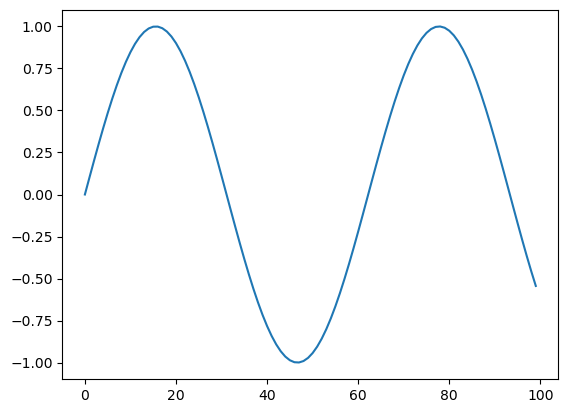

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit

#. Time-series data
n_samples = 100
X = np.arange(n_samples).reshape(-1,1)
y = np.sin(np.linspace(0,10, n_samples))

#. TimeSeries CV
ts_cv = TimeSeriesSplit(n_splits=5)

#. Ridge Model
ridge_model = Ridge()

#. Perform TS CV
for train_idx, test_idx in ts_cv.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    ridge_model.fit(X_test, y_test)
    score = ridge_model.score(X_test, y_test)

    print(f"Test score: { round(score, 3) }")

#. Plot data
ax = plt.plot(X, y)

### Group k-Fold Cross-Validation

`Groups should not overlap in training and testing.`

In [185]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GroupKFold

#. Dummy data
X = np.random.rand(20, 2)
y = np.random.randint(0, 2, 20)
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3,
                   4, 4, 4, 5, 5, 5, 6, 6, 6, 6])

#. Group CV
gkf_cv = GroupKFold(n_splits=3)

#. SVM model
svm_model = SVC()

#. Perform Group CV
for train_idx, test_idx in gkf_cv.split(X, y, groups):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    svm_model.fit(X_train, y_train)
    score = svm_model.score(X_test, y_test)

    print(f"Group fold test score: { round(score, 3) }")

Group fold test score: 0.571
Group fold test score: 0.429
Group fold test score: 0.833


## Cross-Validation with Hyperparameter Tuning

In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#. Load data
data = load_iris()
X, y = data.data, data.target

#. Hyperparameters
param_grid = {
    "n_estimators": [10,50, 100], 
    "max_depth": [None, 10, 20]
}

#. RF model
rf_model = RandomForestClassifier(random_state=42)

#. Grid search
grid_search = GridSearchCV(
    rf_model, 
    param_grid, 
    cv=5, 
    scoring="accuracy")
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validated accuracy:", round(grid_search.best_score_, 3))

Best parameters: {'max_depth': None, 'n_estimators': 10}
Best cross-validated accuracy: 0.967


___

## Overfitting cheks

### Generate data

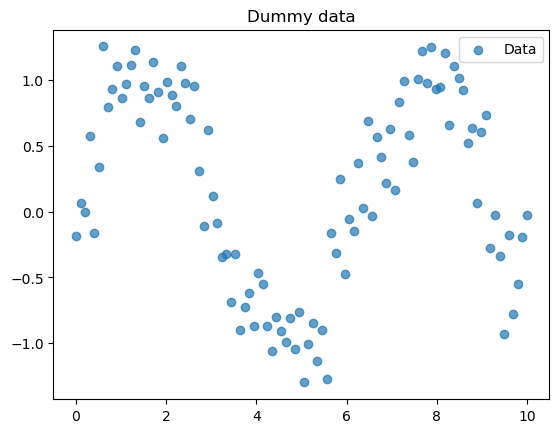

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#. Dummy data
np.random.seed(40)
X = np.linspace(0, 10, 100)
y = np.sin(X) + np.random.normal(0, 0.3, size=X.shape)

#. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#. Plot data
plt.scatter(X, y, label="Data", alpha=0.7)
plt.legend()
plt.title("Dummy data")
plt.show()

### Overfitting without CV

Train Error (Overfitted Model): 0.074
Test Error (Overfitted Model): 0.092


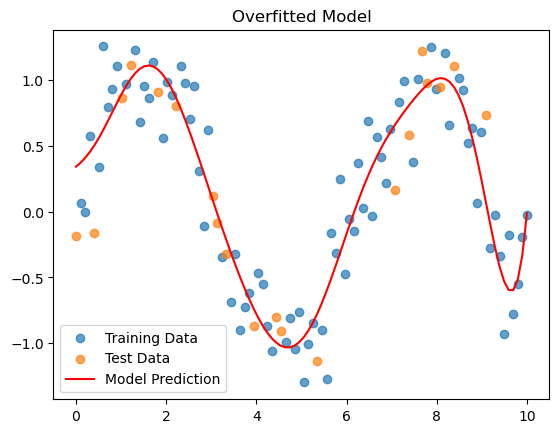

In [86]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

#. Overfitting data
poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train.reshape(-1, 1))
X_test_poly = poly_features.transform(X_test.reshape(-1, 1))

#. LR model 
lr_model = LinearRegression()
lr_model.fit(X_train_poly, y_train)

#. Prediction
y_train_pred = lr_model.predict(X_train_poly)
y_test_pred = lr_model.predict(X_test_poly)

#. Evaluate
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f"Train Error (Overfitted Model): {train_error:.3f}")
print(f"Test Error (Overfitted Model): {test_error:.3f}")

# Plot results
plt.scatter(X_train, y_train, label="Training Data", alpha=0.7)
plt.scatter(X_test, y_test, label="Test Data", alpha=0.7)
plt.plot(X, lr_model.predict(poly_features.transform(X.reshape(-1, 1))), 
         color='red', label="Model Prediction")
plt.legend()
plt.title("Overfitted Model")
plt.show()

### Identifying Overfitting with CV

In [88]:
from sklearn.model_selection import cross_val_score

#. Run CV
scores = cross_val_score(
    lr_model, 
    poly_features.fit_transform(X.reshape(-1,1)),
    y, 
    cv=5, scoring="neg_mean_squared_error"
)
mean_cv_score = -scores.mean()

print(f"Cross-Validation Error (Overfitted Model): { round(mean_cv_score, 3) }")

Cross-Validation Error (Overfitted Model): 19360170.945


**REMARKS**:
- The train error will be low, but the test error and cross-validation error will be high, indicating overfitting.
- Fixing Overfitting with a Simpler Model, that is, reduce the polynomial degree to fix overfitting.

___